<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/The_Movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
# changing the working directory 
%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [ ]:
%ls 

credits.csv  keywords.csv  links_small.csv      ratings.csv
kaggle.json  links.csv     movies_metadata.csv  ratings_small.csv


In [ ]:
#!kaggle datasets download -d rounakbanik/the-movies-dataset

In [ ]:
!unzip \*.zip && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [ ]:
%ls 

credits.csv  keywords.csv  links_small.csv      ratings.csv
kaggle.json  links.csv     movies_metadata.csv  ratings_small.csv


In [ ]:
import numpy as np
from subprocess import check_output

import json
import datetime 
import ast
import pandas as pd 
from scipy import stats
from wordcloud import WordCloud, STOPWORDS

# ploting libraries 
%matplotlib inline
from IPython.display import Image, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.offline as py 
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go 
import plotly.tools as tls
import warnings 
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [ ]:
df_metadata = pd.read_csv('./movies_metadata.csv')
df_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## Lets explore the features 

In [ ]:
df_metadata.columns 

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:
# types 
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# lets drop some column which are not required to us

df_metadata = df_metadata.drop(['imdb_id'], axis=1)

df_metadata = df_metadata.drop(['original_title'], axis=1)

df_metadata = df_metadata.drop(['adult'], axis=1)

In [ ]:
# let's look into revenue column to find out which files have zero revenue
df_metadata[df_metadata['revenue'] != 0].shape

(7414, 21)

In [ ]:
# so here we can see only 7414 movies have recorded revenue 
df_metadata['revenue'] = df_metadata['revenue'].replace(0, np.nan)

In [ ]:
df_metadata['budget'] = pd.to_numeric(df_metadata['budget'], errors='coerce')

df_metadata['budget'] = df_metadata['budget'].replace(0, np.nan)

df_metadata[df_metadata['budget'].isnull()].shape

(36576, 21)

In [ ]:
# now let's take look into two very important columns year and return year which year movie released, re
df_metadata['return'] = df_metadata['revenue']/df_metadata['budget']


In [ ]:
# lets look into release date 
# transform data time into more pythonic way 
df_metadata['release_date'] = pd.to_datetime(df_metadata['release_date'], errors='coerce').apply(lambda x : str(x).split('-')[0] if x != np.nan else np.nan)

In [ ]:
df_metadata.release_date

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
45461     NaT
45462    2011
45463    2003
45464    1917
45465    2017
Name: release_date, Length: 45466, dtype: object

# Exploratory Data Analysis 
- let's see what kinds of words are popular & frequently more used as title 

- generate word clouds

- We will use to columns - title and overview to generate word clouds

In [ ]:
# let's convert to string type 
df_metadata['title'] = df_metadata['title'].astype('str')

df_metadata['overview'] = df_metadata['overview'].astype('str')

#lets join titles continously seperated by space 

title_data = ' '.join(df_metadata['title'])
overview_data = ' '.join(df_metadata['overview'])

In [ ]:
# lets generated now- word clouds 

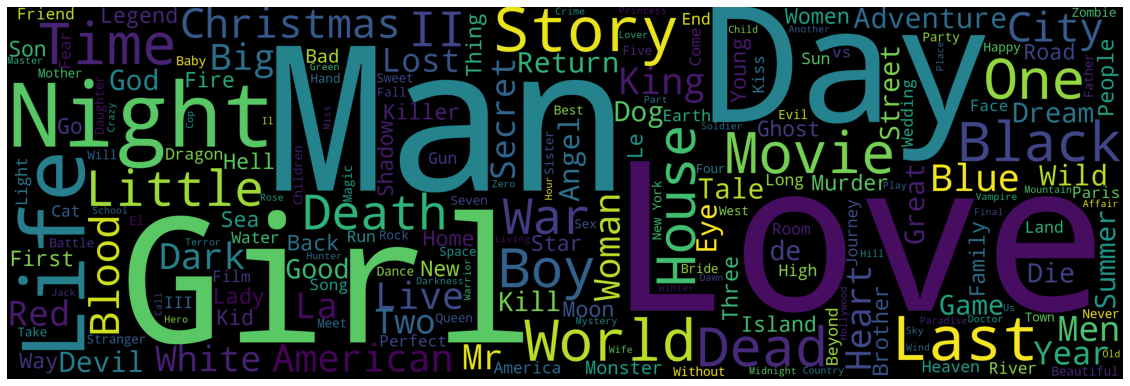

In [ ]:
title_cloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=1000, width=3000).generate(title_data)
plt.figure(figsize=(20, 12))
plt.imshow(title_cloud)
plt.axis('off')
plt.show()

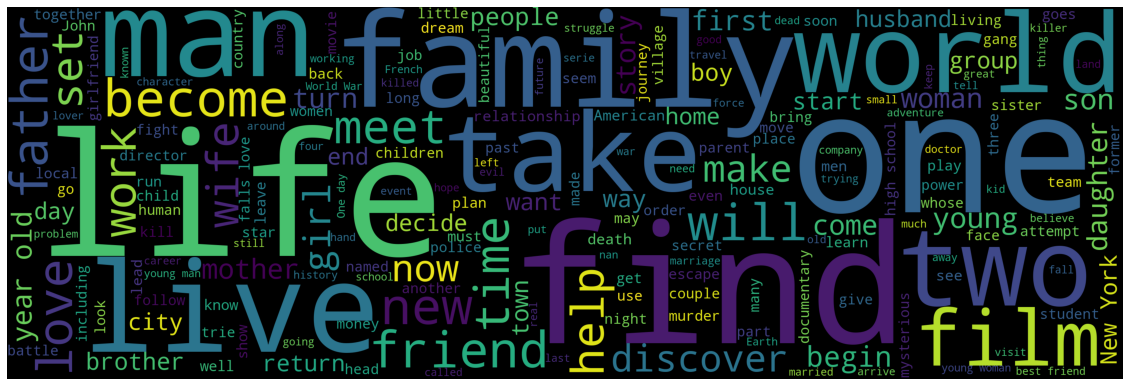

In [ ]:
overview_cloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=1000, width=3000).generate(overview_data)
plt.figure(figsize=(20, 12))
plt.imshow(overview_cloud)
plt.axis('off')
plt.show()

In [ ]:
# life is the most commonly used word in movie titles. 
#One and Find are also popular in Movie Blurbs. Togethher with 
# love, Man, Girl these wordclouds give us a pretty good idea of the most popular themes presesnt in movies

## Let's explore another important feature [production_countries]
- what are famous destinations ?

In [ ]:
df_metadata['production_countries'].value_counts()

[{'iso_3166_1': 'US', 'name': 'United States of America'}]                                                                                             17851
[]                                                                                                                                                      6282
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]                                                                                                        2238
[{'iso_3166_1': 'FR', 'name': 'France'}]                                                                                                                1654
[{'iso_3166_1': 'JP', 'name': 'Japan'}]                                                                                                                 1356
                                                                                                                                                       ...  
[{'iso_3166_1': 'US', 'name': 'United States of America'},

In [ ]:
df_metadata.production_countries[1]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [ ]:
df_metadata['production_countries'] = df_metadata['production_countries'].fillna('[]').apply(ast.literal_eval)

df_metadata['production_countries'] = df_metadata['production_countries'].apply(lambda x : [i['name'] for i in x] if isinstance(x, list) else [])

In [ ]:
countries = df_metadata.apply(lambda x : pd.Series(x['production_countries']), axis=1).stack().reset_index(level=1, drop=True)
countries.name = 'countries'

In [ ]:
countries.value_counts()

United States of America                21153
United Kingdom                           4094
France                                   3940
Germany                                  2254
Italy                                    2169
                                        ...  
Gibraltar                                   1
United States Minor Outlying Islands        1
Netherlands Antilles                        1
Barbados                                    1
Martinique                                  1
Name: countries, Length: 160, dtype: int64

In [ ]:
# let's build data to plot 
# we will build custom dataframe 

countries_data = df_metadata.drop('production_countries', axis=1).join(countries)

countries_data = pd.DataFrame(countries_data['countries'].value_counts())

# lets build a column with index 
countries_data['country'] = countries_data.index
countries_data.columns=['num_movies', 'country']
countries_data = countries_data.reset_index().drop('index', axis=1)
countries_data.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India
